In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from functions.diameters import spreadDiameter
from videoWriterClass import videoWriterClass

In [15]:
myWriter = videoWriterClass()

In [137]:
def diameter(frame, plotFlag, printFlag):
    
    # STATES
    # + droplet (r_sd, r_bd, r_cd)
    # + tranient (r_sd, r_bd)
    # + disappeared (r_sd)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    th,otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    kernel = np.ones((10,10))
    otsu = cv2.dilate(otsu, kernel)

    # Find contours
    cnts, _ = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = np.concatenate(cnts) # Concatenate all contours -> to get the outer one

    # # Determine and draw bounding rectangle
    x, y, w, h = cv2.boundingRect(cnts)
    center = (int(x+w/2), int(y+h/2))
    r_sd = np.min([int(w/2),int(h/2)])

    polar_image = cv2.warpPolar(
            src=otsu,
            center=center,
            dsize=(r_sd,h),
            maxRadius=r_sd, 
            flags=cv2.WARP_FILL_OUTLIERS)


    #polar_image = cv2.bitwise_not(polar_image)
    polar_image = np.float32(polar_image)
    p_mean = np.mean(polar_image, axis=0, dtype=np.float32)

    # core diameter
    index_core = np.where(p_mean == 255)[0]
    band_core = len(index_core)
    if band_core >= 15:
        r_cd = index_core[-1]
    else:
        r_cd = None

    index_burst= np.where(p_mean <= 20)[0]
    band_burst = len(index_burst)
    if band_burst >= 15:
        r_bd = index_burst[-1]
    else:
        r_bd = None
 
    if printFlag:
        print(band_core)
        print(band_burst)
        print(f"Center = {center}pix")
        print(f"Spreading Diameter = {r_sd}pix")
        print(f"Bursting Diameter = {r_bd}pix")
        print(f"Core Diameter = {r_cd}pix")
    if plotFlag:
        plt.imshow(otsu)
        plt.show()
        plt.imshow(polar_image)
        plt.show()
        plt.plot(p_mean)
        plt.show()
    
    return (center, r_cd, r_bd, r_sd)

---------------------------------------
Frameindex = 0
106
27
Center = (466, 461)pix
Spreading Diameter = 175pix
Bursting Diameter = 140pix
Core Diameter = 105pix


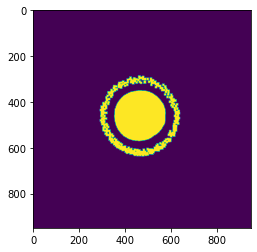

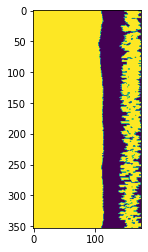

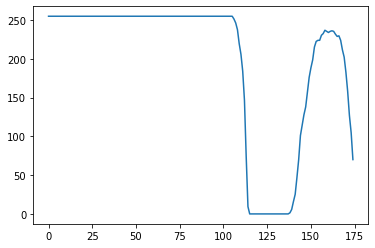

---------------------------------------
Frameindex = 50
121
28
Center = (466, 464)pix
Spreading Diameter = 281pix
Bursting Diameter = 165pix
Core Diameter = 120pix


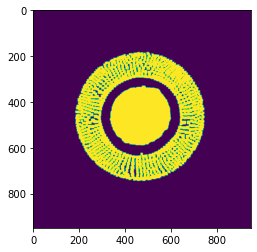

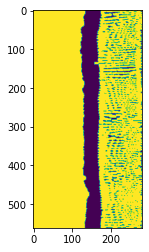

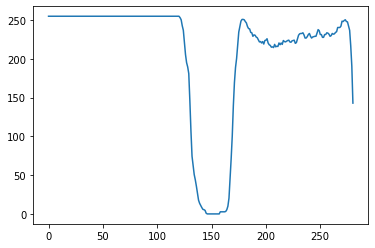

---------------------------------------
Frameindex = 100
124
1
Center = (451, 467)pix
Spreading Diameter = 331pix
Bursting Diameter = Nonepix
Core Diameter = 123pix


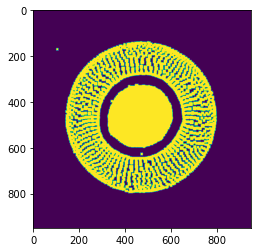

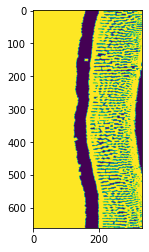

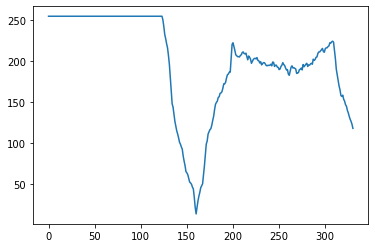

---------------------------------------
Frameindex = 150
133
21
Center = (469, 469)pix
Spreading Diameter = 369pix
Bursting Diameter = 170pix
Core Diameter = 132pix


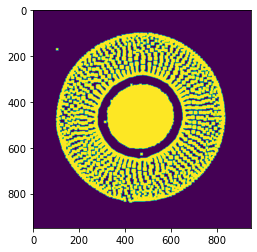

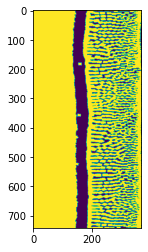

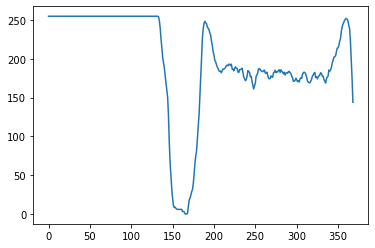

---------------------------------------
Frameindex = 200
134
25
Center = (471, 467)pix
Spreading Diameter = 399pix
Bursting Diameter = 169pix
Core Diameter = 133pix


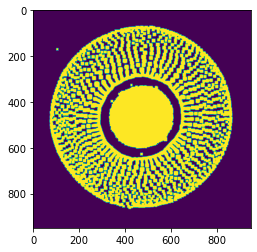

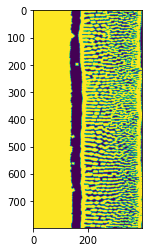

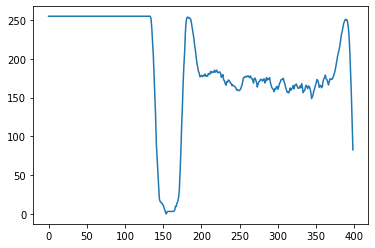

---------------------------------------
Frameindex = 250
119
22
Center = (471, 466)pix
Spreading Diameter = 421pix
Bursting Diameter = 153pix
Core Diameter = 118pix


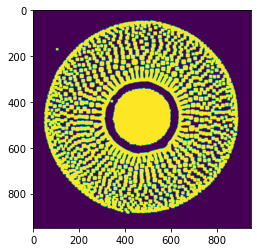

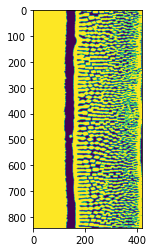

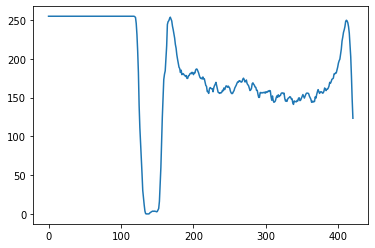

---------------------------------------
Frameindex = 300
52
37
Center = (472, 464)pix
Spreading Diameter = 438pix
Bursting Diameter = 114pix
Core Diameter = 51pix


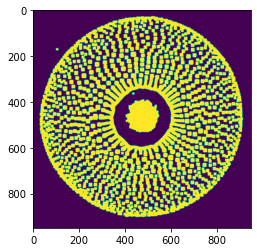

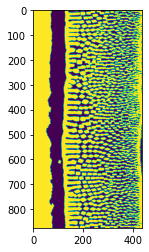

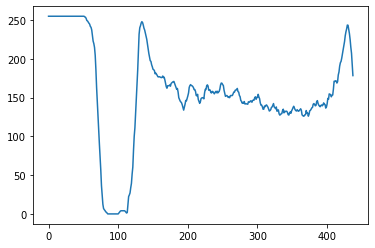

---------------------------------------
Frameindex = 350
5
0
Center = (470, 461)pix
Spreading Diameter = 450pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


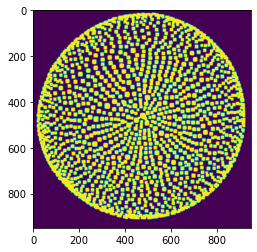

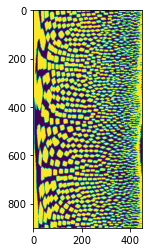

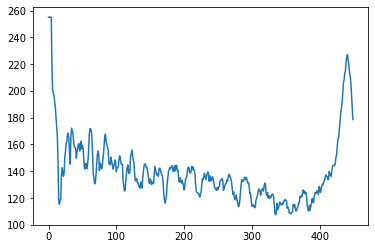

---------------------------------------
Frameindex = 400
3
0
Center = (470, 459)pix
Spreading Diameter = 459pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


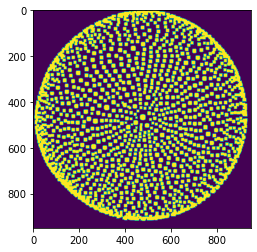

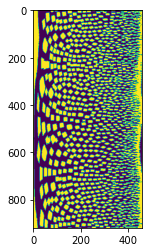

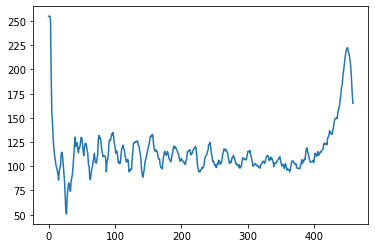

---------------------------------------
Frameindex = 450
2
0
Center = (470, 462)pix
Spreading Diameter = 462pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


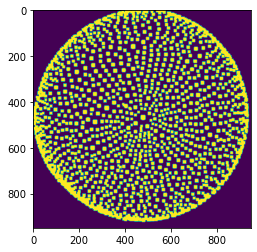

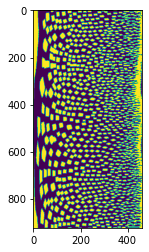

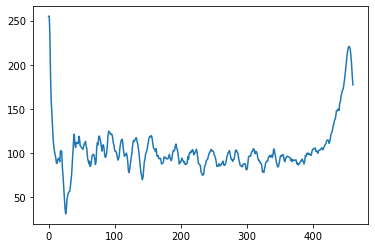

---------------------------------------
Frameindex = 500
2
0
Center = (472, 463)pix
Spreading Diameter = 463pix
Bursting Diameter = Nonepix
Core Diameter = Nonepix


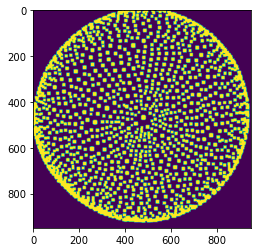

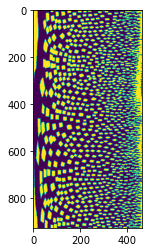

In [138]:
for i in range(0,800,50):
    print("---------------------------------------")
    print(f"Frameindex = {i}")
    frame = myWriter.getSingleImage(frameNumber=i)
    data = diameter(frame, plotFlag=True, printFlag=True)
